# Time Series Analysis of SEDAC PM2.5 Grids via Statistical API

In [1]:
import os
import yaml
from munch import munchify

### _Setup configuration and environment_

In [2]:
# define repo name and get root working directory
repo = 'statistical-api'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

In [3]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'byoc' )
cfg_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\statistical-api\\cfg\\byoc'

In [4]:
# get pathname to configuration file
cfg_file = os.path.join( cfg_path, 'pm25.yml' )

In [5]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            bands: [
                                "pm25",
                                "dataMask"
                            ]
                        }],
                        output: [
                        {
                            id: "output_pm25",
                            bands: 1,
                            sampleType: "FLOAT32"
                        },
                        {
                            id: "dataMask",
                            bands: 1
                        } ]
                    }
                }
                function evaluatePixel(samples) {
                    return {
                        output_pm25: [samples.pm25],
                        dataMask: [samples.dataMask]
                    }
                }    
    inputs:
        - collection: byoc-8264

In [6]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )
config

Munch({'request': Munch({'evalscript': '//VERSION=3\nfunction setup() {\n    return {\n        input: [{\n            bands: [\n                "pm25",\n                "dataMask"\n            ]\n        }],\n        output: [\n        {\n            id: "output_pm25",\n            bands: 1,\n            sampleType: "FLOAT32"\n        },\n        {\n            id: "dataMask",\n            bands: 1\n        } ]\n    }\n}\nfunction evaluatePixel(samples) {\n    return {\n        output_pm25: [samples.pm25],\n        dataMask: [samples.dataMask]\n    }\n}    \n', 'inputs': [Munch({'collection': 'byoc-8264570a-02b7-4196-ae8e-0c9d7af766e7'})]}), 'responses': Munch({'default': Munch({'statistics': Munch({'default': Munch({'percentiles': Munch({'k': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})})})})})})

### _Replicate use case results taken from Sentinel-Hub documentation_

In [7]:
# define aggregation timeframe
from datetime import datetime
timeframe = { 'start' : datetime.strptime('2000-01-01', '%Y-%m-%d'), 
              'end' : datetime.strptime('2021-01-01', '%Y-%m-%d') }

In [8]:
# create instance of shclient class
from statisticalapi import Client
client = Client( config )

In [9]:
# define min and max latlons
coords = 20, 30, 25, 35
resolution = 1000

bbox = client.getBoundingBox( coords )

In [10]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=resolution, bbox=bbox, interval='P1Y' )

In [11]:
response._dfs[ 0 ]

,interval_from,interval_to,output_pm25_B0_min,output_pm25_B0_max,output_pm25_B0_mean,output_pm25_B0_stDev,output_pm25_B0_sampleCount,output_pm25_B0_noDataCount,output_pm25_B0_percentiles_0.0,output_pm25_B0_percentiles_70.0,output_pm25_B0_percentiles_10.0,output_pm25_B0_percentiles_20.0,output_pm25_B0_percentiles_40.0,output_pm25_B0_percentiles_80.0,output_pm25_B0_percentiles_90.0,output_pm25_B0_percentiles_50.0,output_pm25_B0_percentiles_100.0,output_pm25_B0_percentiles_30.0,output_pm25_B0_percentiles_60.0
0,2000-01-01,2001-01-01,12.2,38.599998,24.584419,5.920566,259182,133375,12.2,28.100000,15.800000,19.500000,23.100000,30.299999,32.500000,24.500000,38.599998,21.600000,25.900000
1,2001-01-01,2002-01-01,12.3,38.400002,25.248846,6.120779,259182,133375,12.3,29.100000,16.700001,19.200001,23.200001,31.500000,33.900002,25.100000,38.400002,21.799999,26.799999
2,2002-01-01,2003-01-01,15.0,52.500000,36.196978,8.199090,259182,133375,15.0,42.200001,22.799999,28.500000,34.599998,44.400002,46.099998,36.700001,52.500000,32.700001,39.000000
3,2003-01-01,2004-01-01,14.0,53.900002,34.168220,8.172085,259182,133375,14.0,38.900002,21.900000,26.500000,32.200001,41.799999,44.500000,34.299999,53.900002,30.299999,36.400002
4,2004-01-01,2005-01-01,13.6,48.000000,33.486067,7.464858,259182,133375,13.6,38.400002,21.299999,26.700001,32.200001,40.400002,42.700001,34.099998,48.000000,30.000000,36.799999
5,2005-01-01,2006-01-01,14.4,49.799999,33.420258,7.389526,259182,133375,14.4,38.200001,21.500000,27.100000,31.799999,40.200001,42.799999,33.799999,49.799999,30.000000,36.000000
6,2006-01-01,2007-01-01,13.6,47.900002,32.567445,5.554074,259182,133375,13.6,35.900002,24.900000,27.200001,31.100000,37.200001,40.200001,32.400002,47.900002,29.700001,34.200001
7,2007-01-01,2008-01-01,14.5,53.200001,31.461970,7.275932,259182,133375,14.5,35.099998,21.000000,25.600000,29.400000,37.000000,41.500000,31.000000,53.200001,27.900000,33.299999
8,2008-01-01,2009-01-01,12.6,56.299999,34.841980,8.307080,259182,133375,12.6,39.200001,23.400000,27.000000,32.299999,41.599998,46.299999,34.500000,56.299999,30.299999,37.299999
9,2009-01-01,2010-01-01,15.4,53.700001,33.624845,7.328615,259182,133375,15.4,37.200001,23.000000,27.799999,31.700001,39.700001,43.700001,33.299999,53.700001,29.900000,35.599998


In [12]:
type( response._dfs[ 0 ] )

pandas.core.frame.DataFrame

### _Compute gradient of regression line through mean PM2.5 concentration_

In [13]:
x = response._dfs[ 0 ].index.values
y = response._dfs[ 0 ][ 'output_pm25_B0_mean' ].values
x, y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int64),
 array([24.58441898, 25.24884625, 36.19697791, 34.16822036, 33.48606674,
        33.420258  , 32.56744458, 31.46197031, 34.84198017, 33.62484519,
        27.05507165, 27.551703  , 33.01561518, 25.20534231, 27.80512689,
        25.36501625, 23.90938422, 29.48733456, 34.20617453, 34.20617453]))

In [14]:
from scipy.stats import linregress
obj = linregress(x, y)
obj.slope

-0.08345595160673354

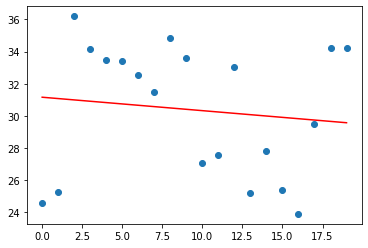

In [15]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='original data')
plt.plot(x, obj.intercept + obj.slope*x, 'r', label='fitted line')